In [2]:
from glob import glob
import pandas as pd
import os

dataset_path = glob('tasks/M*')
save_path = './output'
os.makedirs(save_path, exist_ok=True)

for path in dataset_path:
    file_path = path + '/test.jsonl'
    dataset_name = path.split('/')[-1]
    print(file_path)
    df = pd.read_json(file_path, lines=True, orient='records')
    output = df['output'][:100]
    output_df = pd.DataFrame(output)
    output_df.to_json(f'{save_path}/{dataset_name}.jsonl', lines=True, orient='records')

tasks/MS_DG_SFT/test.jsonl
tasks/MS/test.jsonl
tasks/MS2/test.jsonl
tasks/MT_DG_SFT/test.jsonl
tasks/MT/test.jsonl
tasks/MT_DG/test.jsonl
tasks/MS_DG/test.jsonl
tasks/MS_TIE/test.jsonl
tasks/MS_DS/test.jsonl
tasks/MT_SRE/test.jsonl
tasks/MS_DHG/test.jsonl
tasks/MT2/test.jsonl
tasks/MT_DS/test.jsonl
tasks/MT_DHG/test.jsonl


In [4]:
from glob import glob
import pandas as pd
import os

dataset_path = glob('tasks/MS2')
save_path = './context'
os.makedirs(save_path, exist_ok=True)

for path in dataset_path:
    file_path = path + '/test.jsonl'
    dataset_name = path.split('/')[-1]
    print(file_path)
    df = pd.read_json(file_path, lines=True, orient='records')
    output = df['input'][:100]
    output_df = pd.DataFrame(output)
    output_df['input'] = output_df['input'].map(lambda x: '```'+ '```'.join(x.split('```')[1:-1]) +'```')
    print(output_df)
    os.makedirs(f'{save_path}/{dataset_name}',exist_ok=True)
    output_df.to_json(f'{save_path}/{dataset_name}/test.jsonl', lines=True, orient='records')

tasks/MS2/test.jsonl
                                                input
0   ```\nDialogue Session #1:\nNeighbors A:Hey the...
1   ```\nDialogue Session #1:\nNeighbors A:I just ...
2   ```\nDialogue Session #1:\nCo-workers A:Can yo...
3   ```\nDialogue Session #1:\nCo-workers A:I foun...
4   ```\nDialogue Session #1:\nDoctor:Hello Patien...
..                                                ...
95  ```\nDialogue Session #1:\nClassmates A:Classm...
96  ```\nDialogue Session #1:\nMentee:I'm feeling ...
97  ```\nDialogue Session #1:\nNeighbors A:Hey, do...
98  ```\nDialogue Session #1:\nClassmates A:It's b...
99  ```\nDialogue Session #1:\nClassmates A:It's s...

[100 rows x 1 columns]


In [13]:
save_path = './output'
os.makedirs(save_path, exist_ok=True)

for path in ["tasks/MS_DHG"]:
    file_path = path + '/train.jsonl'
    dataset_name = path.split('/')[-1]
    print(file_path)
    df = pd.read_json(file_path, lines=True, orient='records')
    output = df
    output_df = pd.DataFrame(output)

tasks/MS_DHG/train.jsonl


In [14]:
len(output_df['input'][0])

7996

In [15]:
from transformers import AutoTokenizer
from datasets import load_dataset, Dataset, DatasetDict
data = Dataset.from_pandas(output_df)
ds = DatasetDict({'train':data})
print(ds)
tokenizer = AutoTokenizer.from_pretrained('pinkmanlove/llama-7b-hf', use_fast=False)

def tokenize_func(example):
    return tokenizer(example['input'], max_length=4096, truncation=True)
# encoded = tokenizer.encode(output_df['input'][0])
# len(encoded)
prep_datda = data.map(tokenize_func, num_proc=96)
print(prep_datda)

DatasetDict({
    train: Dataset({
        features: ['input', 'output'],
        num_rows: 8000
    })
})


Map (num_proc=96): 100%|██████████| 8000/8000 [00:14<00:00, 570.25 examples/s]


Dataset({
    features: ['input', 'output', 'input_ids', 'attention_mask'],
    num_rows: 8000
})


/home/uj-user/Yo/hybrid-ltm/ltm-venv/lib/python3.8/site-packages/datasets/table.py:1395: FutureWarning: promote has been superseded by mode='default'.
  block_group = [InMemoryTable(cls._concat_blocks(list(block_group), axis=axis))]
/home/uj-user/Yo/hybrid-ltm/ltm-venv/lib/python3.8/site-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by mode='default'.
  table = cls._concat_blocks(blocks, axis=0)


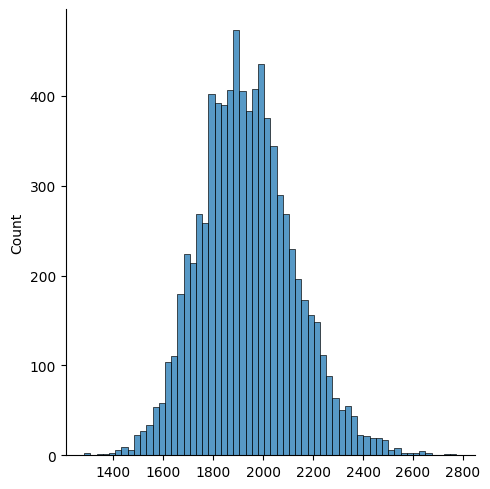

In [16]:
import seaborn as sns
data_len = [len(p) for p in prep_datda['input_ids']]
sns.displot(data_len)

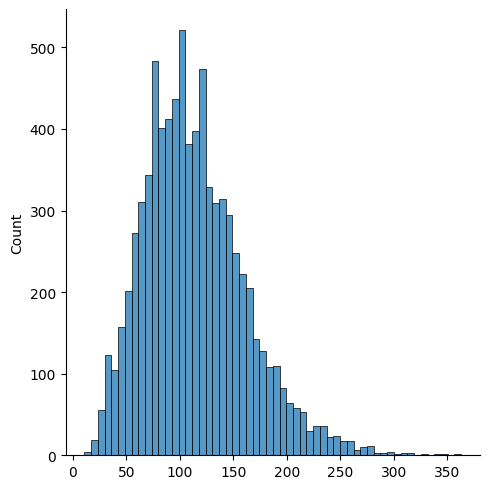

In [12]:
import seaborn as sns
data_len = [len(p) for p in prep_datda['output']]
sns.displot(data_len)

In [9]:
from evaluate import load
bertscore = load("bertscore")
predictions = ["hello there", "general kenobi"]
references = ["hello there", "general kenobi"]
results = bertscore.compute(predictions=predictions, references=references, lang="en")

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
